# Develop an ML Linear Regression model to learn Polymer Property

In this tutorial we will learn to create an ML model for polymer property prediction. We will achieve the following things:
1. Load Polymer dataset
2. Visualize the polymer property and feature data
3. Use Scikit-learn library to build polymer prediction model (linear regression)
4. Understand the various error metrics
5. Model assessment, Intro to cross-validation
6. Five-fold cross validation
7. Regularization
8. Feature selection using recursive feature elimination
9. Plot errors for all trained models
10. Feature importance from weights
11. Prediction for new polymers

#### Library imports for general data manipulation

In [1]:
import pandas as pd  # To play with data tables
import matplotlib.pyplot as plt  # To visualize data
import numpy as np

### 1. Load data table and prepare for ML model training

In [ ]:
# Download Train data file in Google colab Folder
!gdown 1UiTFEpQee9ToyrhaC14Hj-wV13-rWOup

In [2]:
data = pd.read_csv('Polymer_Eg_data.csv')

#### Notes about the data table

Above we see that data table has 5 types of columns:
1. smiles: These are string representation of polymers. We will use them to visualize polymers.
2. bandgap_chain: This is the band gap values of polymers. Our target property (y).
3. several columns starting with keyword "mfp_": These are molecular fingerprint columns that we will use for ML model. Our material fingeprints (X).

Notice we use small letter "y" and capital letter "X" to represent our target property and materials fingeprints respectively. Is there any particular reason for representing one with small and the other with capital alphabet?

#### Seperate X and y data

In [3]:
data.columns[data.columns.str.contains("mfp_")]

Index(['mfp_MQNs13', 'mfp_MQNs14', 'mfp_MQNs15', 'mfp_MQNs16', 'mfp_MQNs17',
       'mfp_MQNs18', 'mfp_MQNs19', 'mfp_MQNs20', 'mfp_MQNs21', 'mfp_MQNs22',
       'mfp_MQNs23', 'mfp_MQNs24', 'mfp_MQNs25', 'mfp_MQNs26', 'mfp_MQNs27',
       'mfp_MQNs28', 'mfp_MQNs29', 'mfp_MQNs30', 'mfp_MQNs31', 'mfp_MQNs32',
       'mfp_MQNs33', 'mfp_MQNs34', 'mfp_MQNs35', 'mfp_MQNs36', 'mfp_MQNs37',
       'mfp_MQNs38', 'mfp_MQNs39', 'mfp_MQNs40', 'mfp_MQNs41', 'mfp_MQNs42',
       'mfp_NumAromaticRings', 'mfp_NumAliphaticRings', 'mfp_Chi0n',
       'mfp_Chi0v', 'mfp_Chi1n', 'mfp_Chi1v', 'mfp_Chi2n', 'mfp_Chi2v',
       'mfp_HallKierAlpha', 'mfp_tpsa'],
      dtype='object')

In [4]:
Xcols = data.columns[data.columns.str.contains("mfp_")]
Xcols

Index(['mfp_MQNs13', 'mfp_MQNs14', 'mfp_MQNs15', 'mfp_MQNs16', 'mfp_MQNs17',
       'mfp_MQNs18', 'mfp_MQNs19', 'mfp_MQNs20', 'mfp_MQNs21', 'mfp_MQNs22',
       'mfp_MQNs23', 'mfp_MQNs24', 'mfp_MQNs25', 'mfp_MQNs26', 'mfp_MQNs27',
       'mfp_MQNs28', 'mfp_MQNs29', 'mfp_MQNs30', 'mfp_MQNs31', 'mfp_MQNs32',
       'mfp_MQNs33', 'mfp_MQNs34', 'mfp_MQNs35', 'mfp_MQNs36', 'mfp_MQNs37',
       'mfp_MQNs38', 'mfp_MQNs39', 'mfp_MQNs40', 'mfp_MQNs41', 'mfp_MQNs42',
       'mfp_NumAromaticRings', 'mfp_NumAliphaticRings', 'mfp_Chi0n',
       'mfp_Chi0v', 'mfp_Chi1n', 'mfp_Chi1v', 'mfp_Chi2n', 'mfp_Chi2v',
       'mfp_HallKierAlpha', 'mfp_tpsa'],
      dtype='object')

In [5]:
X = data[Xcols]
X

,mfp_MQNs13,mfp_MQNs14,mfp_MQNs15,mfp_MQNs16,mfp_MQNs17,mfp_MQNs18,mfp_MQNs19,mfp_MQNs20,mfp_MQNs21,mfp_MQNs22,...,mfp_NumAromaticRings,mfp_NumAliphaticRings,mfp_Chi0n,mfp_Chi0v,mfp_Chi1n,mfp_Chi1v,mfp_Chi2n,mfp_Chi2v,mfp_HallKierAlpha,mfp_tpsa
0,0.800000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.900000,0.100000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.909091,0.000000,0.000000,0.000000,0.000000,0.0,0.181818,0.000000,0.000000,0.0,...,0.000000,0.0,0.863636,0.136364,0.409091,0.045455,0.011364,0.011364,0.000000,0.000000
2,0.928571,0.000000,0.000000,0.000000,0.000000,0.0,0.214286,0.000000,0.000000,0.0,...,0.000000,0.0,0.857143,0.142857,0.410714,0.053571,0.017857,0.017857,0.000000,0.000000
3,0.941176,0.000000,0.000000,0.000000,0.000000,0.0,0.235294,0.000000,0.000000,0.0,...,0.000000,0.0,0.852941,0.147059,0.411765,0.058824,0.022059,0.022059,0.000000,0.000000
4,0.950000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000,0.000000,0.0,...,0.000000,0.0,0.850000,0.150000,0.412500,0.062500,0.031250,0.031250,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,0.980769,0.000000,0.000000,0.000000,0.000000,0.0,0.307692,0.019231,0.019231,0.0,...,0.000000,0.0,0.834508,0.161431,0.409909,0.073370,0.042628,0.042628,0.001538,0.028365
4078,0.862745,0.009804,0.019608,0.058824,0.058824,0.0,0.264706,0.098039,0.049020,0.0,...,0.019608,0.0,0.775296,0.216473,0.388777,0.109365,0.062963,0.062963,0.033725,0.150980
4079,0.787879,0.015152,0.030303,0.090909,0.090909,0.0,0.272727,0.287879,0.151515,0.0,...,0.030303,0.0,0.714552,0.260006,0.354641,0.128967,0.078279,0.078279,0.057576,0.471742
4080,0.781250,0.015625,0.031250,0.093750,0.093750,0.0,0.265625,0.281250,0.140625,0.0,...,0.031250,0.0,0.714269,0.261144,0.356066,0.129504,0.077232,0.077232,0.056250,0.384844


In [6]:
y = data['bandgap_chain']
y

0       6.8063
1       6.4609
2       6.6228
3       6.7380
4       6.7268
         ...  
4077    0.1118
4078    2.0462
4079    2.8068
4080    2.1853
4081    2.8678
Name: bandgap_chain, Length: 4082, dtype: float64

### 2. Visualize data

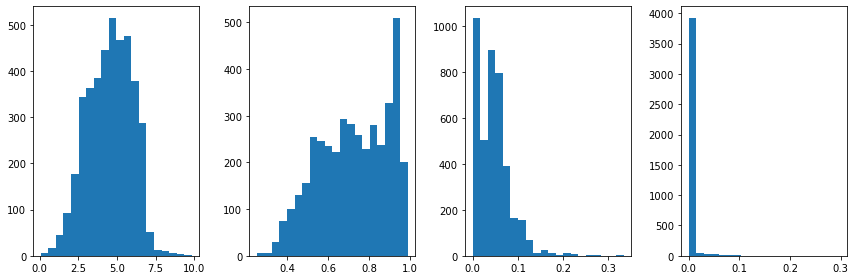

In [7]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(12,4))

ax1.hist(y.values, bins=20)
ax2.hist(X.values[:,0], bins=20)
ax3.hist(X.values[:,1], bins=20)
ax4.hist(X.values[:,2], bins=20)

plt.tight_layout()

### Question

1. What is the use of visualizing target property and features data?
2. Do you see any notable difference in the range of the different features? Is it expected? Can this have any consequences in the learning of the model?

 
---


### Import Library for linear regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge

### 3. Fit model linear model

In [9]:
lr = LinearRegression()

In [10]:
model = lr.fit(X,y)

### 4. Assess model accuracy

In [11]:
y_pred = model.predict(X)

In [12]:
mse = mean_squared_error(y, y_pred)
print("Mean squared error: %.2f" % mse)

r2 = r2_score(y, y_pred)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2)

Mean squared error: 0.61
Coefficient of determination: 0.70


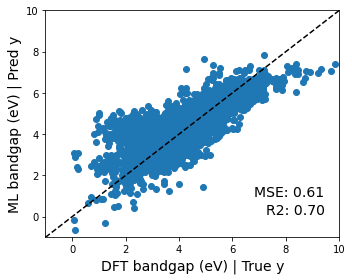

In [13]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
ax1.scatter(y,y_pred)
ax1.plot([-1,11], [-1,11], '--k')

ax1.set_xlabel('DFT bandgap (eV) | True y', fontsize=14)
ax1.set_ylabel('ML bandgap (eV) | Pred y', fontsize=14)

ax1.text(0.95, 0.18, "MSE: %.2f"%mse, transform=ax1.transAxes, ha='right', fontsize=14)
ax1.text(0.95, 0.1, "R2: %.2f"%r2, transform=ax1.transAxes, ha='right', fontsize=14)    

ax1.set_xlim([-1,10])
ax1.set_ylim([-1,10])

plt.tight_layout()
plt.show()

#### Error with Baseline (Avg. value model)

In [14]:
y_avg_pred = [y.mean()]*len(y)

In [15]:
print("Mean squared error: %.2f" % mean_squared_error(y, y_avg_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, y_avg_pred))

Mean squared error: 2.04
Coefficient of determination: 0.00


### Question
1. Why is it important to compare model performance with a baseline model?
2. Is there any issue with the way we have computed the accuracy/ performance of the linear regression model.

***

### 5. Splitting the data into Train and Validation set (Intro to Cross-validation)

In [16]:
from sklearn.model_selection import KFold

In [17]:
kf = KFold(n_splits=2)

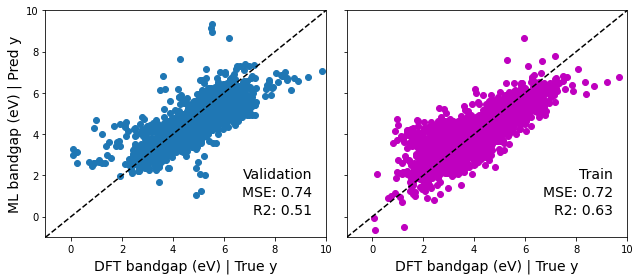

Mean squared error: 0.74
Coefficient of determination: 0.51


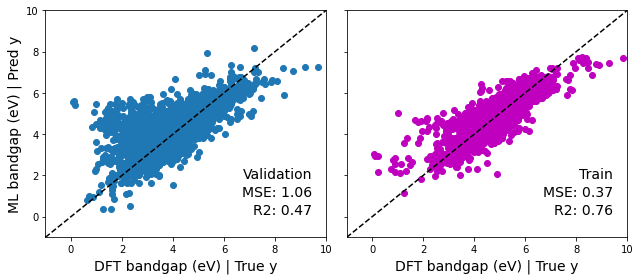

Mean squared error: 1.06
Coefficient of determination: 0.47


In [18]:
for train, val in kf.split(X):
    X_cv_train = X.values[train]
    X_cv_val = X.values[val]

    y_cv_train = y.values[train]
    y_cv_val = y.values[val]
    
    
    # Model fit and prediction
    model = lr.fit(X_cv_train,y_cv_train)
    y_pred_val = model.predict(X_cv_val)
    y_pred_train = model.predict(X_cv_train)


    # Computing errors
    mse_val = mean_squared_error(y_cv_val, y_pred_val)
    mse_train = mean_squared_error(y_cv_train, y_pred_train)

    r2_val = r2_score(y_cv_val, y_pred_val)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    
    # Plot Parity plot
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4), sharey=True, sharex=True)
    ax1.scatter(y_cv_val,y_pred_val)
    ax1.text(0.95, 0.26, "Validation", transform=ax1.transAxes, ha='right', fontsize=14)    
    ax1.text(0.95, 0.18, "MSE: %.2f"%mse_val, transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.text(0.95, 0.1, "R2: %.2f"%r2_val, transform=ax1.transAxes, ha='right', fontsize=14)    
    ax1.plot([-1,11], [-1,11], '--k')

    ax2.scatter(y_cv_train,y_pred_train, c='m')
    ax2.text(0.95, 0.26, "Train", transform=ax2.transAxes, ha='right', fontsize=14)        
    ax2.text(0.95, 0.18, "MSE: %.2f"%mse_train, transform=ax2.transAxes, ha='right', fontsize=14)    
    ax2.text(0.95, 0.1, "R2: %.2f"%r2_train, transform=ax2.transAxes, ha='right', fontsize=14)        
    ax2.plot([-1,11], [-1,11], '--k')

    ax1.set_xlabel('DFT bandgap (eV) | True y', fontsize=14)
    ax2.set_xlabel('DFT bandgap (eV) | True y', fontsize=14)    
    ax1.set_ylabel('ML bandgap (eV) | Pred y', fontsize=14)

    ax1.set_xlim([-1,10])
    ax1.set_ylim([-1,10])

    plt.tight_layout()
    plt.show()

    print("Mean squared error: %.2f" % mse_val)
    print("Coefficient of determination: %.2f" % r2_val) 

In [19]:
train

array([   0,    1,    2, ..., 2038, 2039, 2040])

### Questions
1. Why error on train set is consistently lower than that on test set?
2. We notice that error on the training and test set is different. Further, the error on test set 1 and test set 2 is also different. Which is the correct value that best *estimate* the performance of the ML model? 

***

### 7. Five fold cross validation

In [20]:
# First we will define function to make plots. This will make the code simpler.

def polt_parity(y_cv_val,y_pred_val, y_cv_train,y_pred_train):
    # Plot Parity plot
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4), sharey=True, sharex=True)
    ax1.scatter(y_cv_val,y_pred_val)
    ax1.text(0.95, 0.34, "Validation", transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.text(0.95, 0.26, "NVal: %s"%len(y_cv_val), transform=ax1.transAxes, ha='right', fontsize=14)        
    ax1.text(0.95, 0.18, "MSE: %.2f"%mse_val, transform=ax1.transAxes, ha='right', fontsize=14)
    ax1.text(0.95, 0.1, "R2: %.2f"%r2_val, transform=ax1.transAxes, ha='right', fontsize=14)    
    ax1.plot([-1,11], [-1,11], '--k')

    ax2.scatter(y_cv_train,y_pred_train, c='m')
    ax2.text(0.95, 0.34, "Train", transform=ax2.transAxes, ha='right', fontsize=14)
    ax2.text(0.95, 0.26, "NTrain: %s"%len(y_cv_train), transform=ax2.transAxes, ha='right', fontsize=14)            
    ax2.text(0.95, 0.18, "MSE: %.2f"%mse_train, transform=ax2.transAxes, ha='right', fontsize=14)    
    ax2.text(0.95, 0.1, "R2: %.2f"%r2_train, transform=ax2.transAxes, ha='right', fontsize=14)        
    ax2.plot([-1,11], [-1,11], '--k')

    ax1.set_xlabel('DFT bandgap (eV) | True y', fontsize=14)
    ax2.set_xlabel('DFT bandgap (eV) | True y', fontsize=14)    
    ax1.set_ylabel('ML bandgap (eV) | Pred y', fontsize=14)

    ax1.set_xlim([-1,10])
    ax1.set_ylim([-1,10])

    plt.tight_layout()
    plt.show()
    
    return None

In [21]:
kf = KFold(n_splits=5)

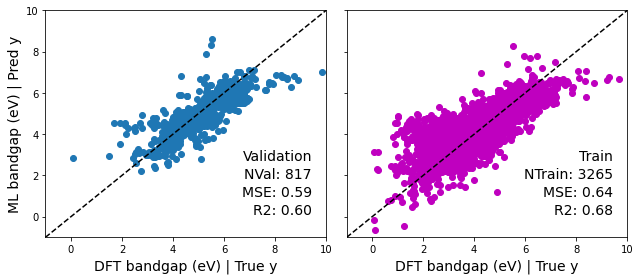

Mean squared error: 0.59
Coefficient of determination: 0.60


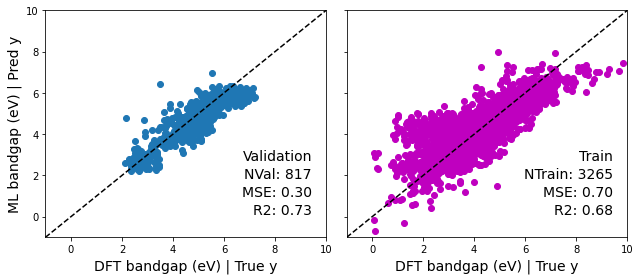

Mean squared error: 0.30
Coefficient of determination: 0.73


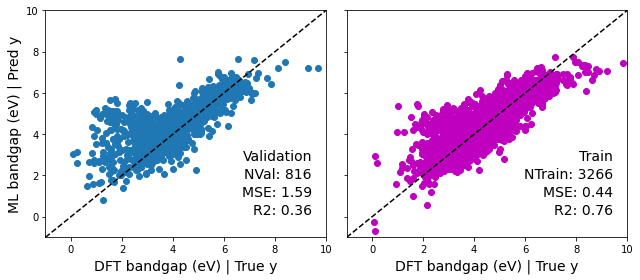

Mean squared error: 1.59
Coefficient of determination: 0.36


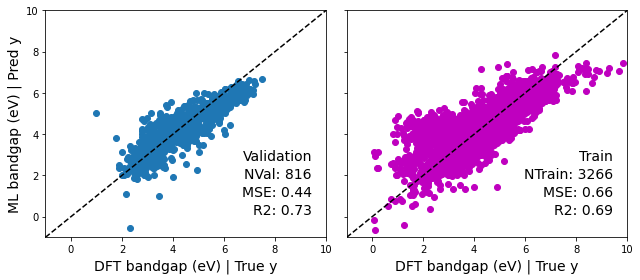

Mean squared error: 0.44
Coefficient of determination: 0.73


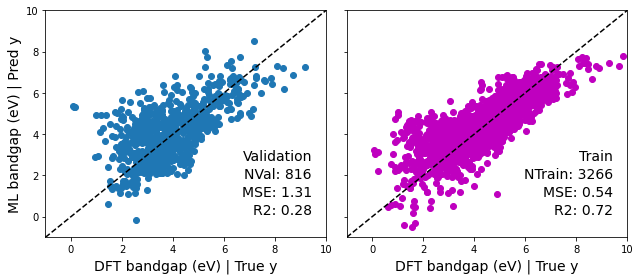

Mean squared error: 1.31
Coefficient of determination: 0.28


In [22]:
errors = []

for idx, (train, val) in enumerate(kf.split(X)):
    X_cv_train = X.values[train]
    X_cv_val = X.values[val]

    y_cv_train = y.values[train]
    y_cv_val = y.values[val]
    
    
    # Model fit and prediction
    model = lr.fit(X_cv_train,y_cv_train)
    y_pred_val = model.predict(X_cv_val)
    y_pred_train = model.predict(X_cv_train)


    # Computing errors
    mse_val = mean_squared_error(y_cv_val, y_pred_val)
    mse_train = mean_squared_error(y_cv_train, y_pred_train)

    r2_val = r2_score(y_cv_val, y_pred_val)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    
    # Plot Parity plot
    polt_parity(y_cv_val,y_pred_val, y_cv_train,y_pred_train)

    print("Mean squared error: %.2f" % mse_val)
    print("Coefficient of determination: %.2f" % r2_val) 
    
    error = {'kfold': idx+1,
             'mse_train': mse_train,
             'mse_val': mse_val,
             'r2_val': r2_val,
             'r2_train': r2_train}

    errors.append(error)

### Question
1. Depending on the test-train split, the test errors are different. What number should we pick to estimate model performance?

In [23]:
errors = pd.DataFrame(errors)
errors

,kfold,mse_train,mse_val,r2_val,r2_train
0,1,0.638631,0.591440,0.597795,0.679573
1,2,0.696019,0.296266,0.734632,0.680920
2,3,0.438427,1.586869,0.361299,0.758727
3,4,0.663057,0.436921,0.726545,0.691533
4,5,0.537672,1.313675,0.281020,0.724397


In [24]:
errors.mean()[['mse_val','r2_val']]

mse_val    0.845034
r2_val     0.540258
dtype: float64

### Question
1. Within the same linear regression learning framework, what can be done to further improve the model performane? Can we manipulate the features to make learning easy?

***

### 7. Regularization to prevent overfitting

In [25]:
lr_l2 = Ridge(alpha=1)

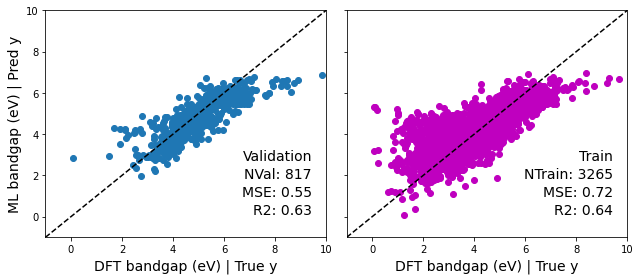

Mean squared error: 0.55
Coefficient of determination: 0.63


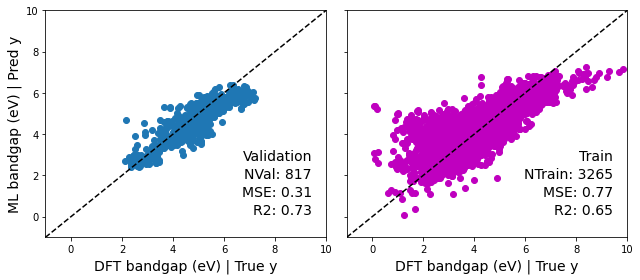

Mean squared error: 0.31
Coefficient of determination: 0.73


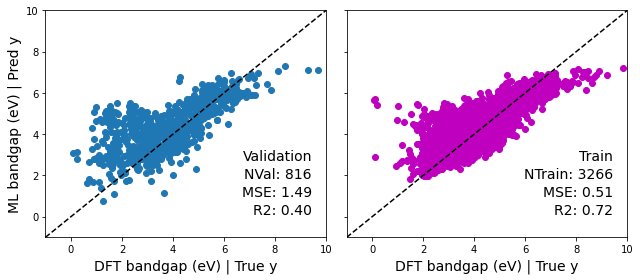

Mean squared error: 1.49
Coefficient of determination: 0.40


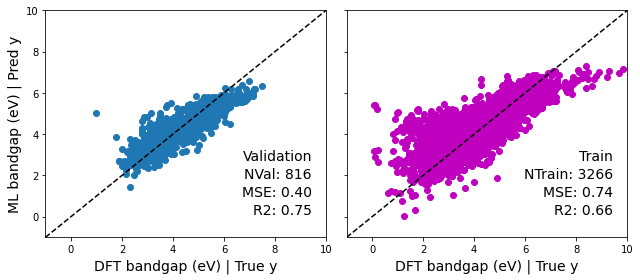

Mean squared error: 0.40
Coefficient of determination: 0.75


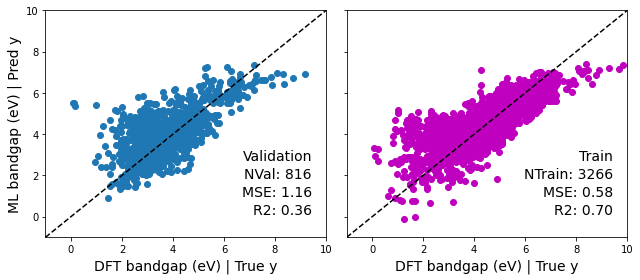

Mean squared error: 1.16
Coefficient of determination: 0.36


In [26]:
errors_l2 = []

for idx, (train, val) in enumerate(kf.split(X)):
    X_cv_train = X.values[train]
    X_cv_val = X.values[val]

    y_cv_train = y.values[train]
    y_cv_val = y.values[val]
    
    
    # Model fit and prediction
    model = lr_l2.fit(X_cv_train,y_cv_train)
    y_pred_val = model.predict(X_cv_val)
    y_pred_train = model.predict(X_cv_train)


    # Computing errors
    mse_val = mean_squared_error(y_cv_val, y_pred_val)
    mse_train = mean_squared_error(y_cv_train, y_pred_train)

    r2_val = r2_score(y_cv_val, y_pred_val)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    
    # Plot Parity plot
    polt_parity(y_cv_val,y_pred_val, y_cv_train,y_pred_train)

    print("Mean squared error: %.2f" % mse_val)
    print("Coefficient of determination: %.2f" % r2_val) 
    
    error = {'kfold': idx+1,
             'mse_train': mse_train,
             'mse_val': mse_val,
             'r2_val': r2_val,
             'r2_train': r2_train}

    errors_l2.append(error)
errors_l2 = pd.DataFrame(errors_l2)

In [27]:
errors_l2.mean()[['mse_val','r2_val']]

mse_val    0.781040
r2_val     0.573805
dtype: float64

In [28]:
errors.mean()[['mse_val','r2_val']]

mse_val    0.845034
r2_val     0.540258
dtype: float64

***

### 7.1 Selecting hyper-parameter using Cross-validation

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
c_values = [0.00001, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 10, 100]
hyper_params = {'alpha':c_values}

In [31]:
lr_ridge = Ridge()

In [32]:
clf = GridSearchCV(lr_ridge, hyper_params, cv=5, scoring='neg_mean_squared_error')

In [33]:
_ = clf.fit(X,y)

In [34]:
mse_list = clf.cv_results_['mean_test_score']*-1

In [35]:
mse_list

array([0.84465095, 0.83906593, 0.8311017 , 0.8115955 , 0.79986437,
       0.78609194, 0.78022661, 0.77971491, 0.78103997, 0.87040877,
       1.08404849])

Text(0, 0.5, 'MSE')

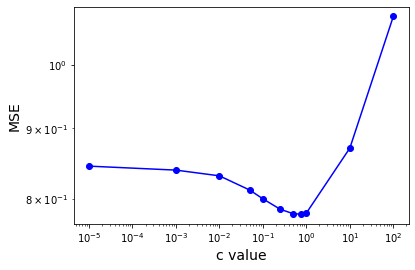

In [36]:
plt.plot(c_values, mse_list, '-bo')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('c value', fontsize=14)
plt.ylabel('MSE', fontsize=14)

In [37]:
mse_list

array([0.84465095, 0.83906593, 0.8311017 , 0.8115955 , 0.79986437,
       0.78609194, 0.78022661, 0.77971491, 0.78103997, 0.87040877,
       1.08404849])

In [38]:
min_idx = np.argmin(mse_list)

In [39]:
c_values[min_idx], mse_list[min_idx]

(0.75, 0.7797149061034391)

In [40]:
lr_ridge_c_opt = Ridge(alpha=c_values[min_idx])

In [41]:
errors_l2_c_opt = []

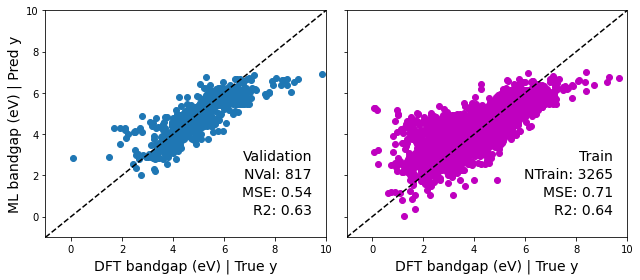

Mean squared error: 0.54
Coefficient of determination: 0.63


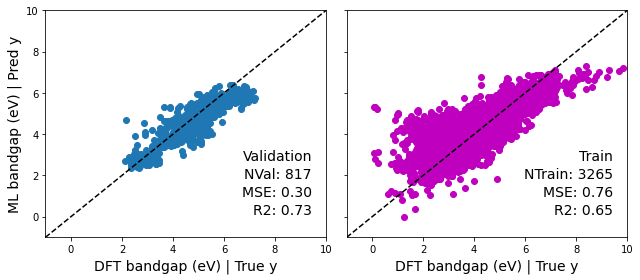

Mean squared error: 0.30
Coefficient of determination: 0.73


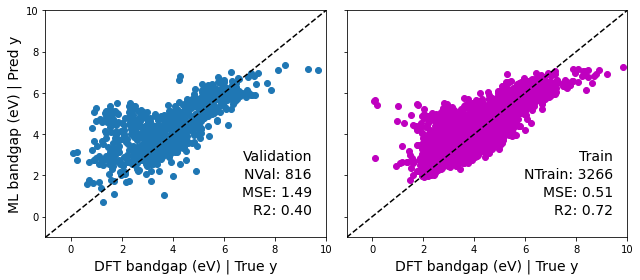

Mean squared error: 1.49
Coefficient of determination: 0.40


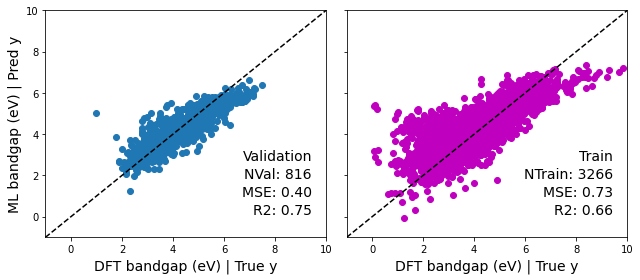

Mean squared error: 0.40
Coefficient of determination: 0.75


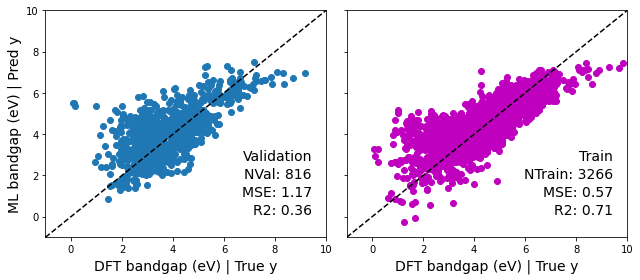

Mean squared error: 1.17
Coefficient of determination: 0.36


In [42]:
for idx, (train, val) in enumerate(kf.split(X)):
    X_cv_train = X.values[train]
    X_cv_val = X.values[val]

    y_cv_train = y.values[train]
    y_cv_val = y.values[val]
    
    
    # Model fit and prediction
    model = lr_ridge_c_opt.fit(X_cv_train,y_cv_train)
    y_pred_val = model.predict(X_cv_val)
    y_pred_train = model.predict(X_cv_train)


    # Computing errors
    mse_val = mean_squared_error(y_cv_val, y_pred_val)
    mse_train = mean_squared_error(y_cv_train, y_pred_train)

    r2_val = r2_score(y_cv_val, y_pred_val)
    r2_train = r2_score(y_cv_train, y_pred_train)
    
    
    # Plot Parity plot
    polt_parity(y_cv_val,y_pred_val, y_cv_train,y_pred_train)

    print("Mean squared error: %.2f" % mse_val)
    print("Coefficient of determination: %.2f" % r2_val) 
    
    error = {'kfold': idx+1,
             'mse_train': mse_train,
             'mse_val': mse_val,
             'r2_val': r2_val,
             'r2_train': r2_train}

    errors_l2_c_opt.append(error)
errors_l2_c_opt = pd.DataFrame(errors_l2_c_opt)

In [43]:
errors_l2_c_opt.mean()[['mse_val','r2_val']]

mse_val    0.779715
r2_val     0.574619
dtype: float64

In [44]:
errors_l2.mean()[['mse_val','r2_val']]

mse_val    0.781040
r2_val     0.573805
dtype: float64

***

### 8. Feature selection for performance improvement

In [45]:
from sklearn.feature_selection import RFECV

In [46]:
lr_l2_rfe = Ridge(alpha=c_values[min_idx])

In [47]:
selector = RFECV(lr_l2_rfe, step=1, cv=5, scoring='neg_mean_squared_error')

In [48]:
selector = selector.fit(X, y)

In [49]:
sel_features = Xcols[selector.support_]

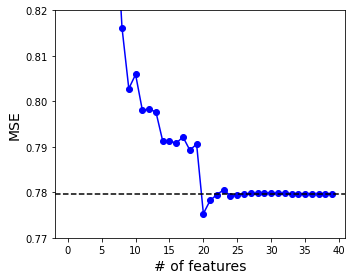

In [50]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
ax1.plot(selector.cv_results_['mean_test_score']*-1, '-bo')
ax1.axhline(errors_l2_c_opt.mean()['mse_val'], linestyle='--', color='k')
ax1.set_ylim(0.77,0.82)
ax1.set_xlabel('# of features', fontsize=14)
ax1.set_ylabel('MSE', fontsize=14)
plt.tight_layout()

In [51]:
print("Initial number of features", selector.n_features_in_)
print("Selected number of features", selector.n_features_)

Initial number of features 40
Selected number of features 21


In [52]:
mse_rfe = (selector.cv_results_['mean_test_score']*-1).min()
print("Mean square error with RFE (eV^2): ", mse_rfe)

Mean square error with RFE (eV^2):  0.7753260719468311


***

### 9. Plot errors of all trained models

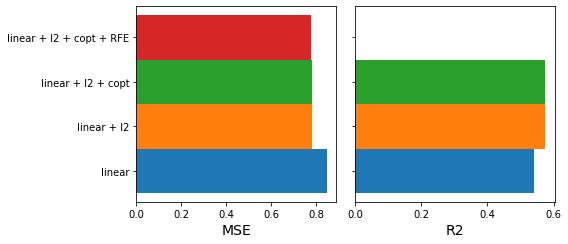

In [53]:
width = 0.1
labels = ['linear','linear + l2','linear + l2 + copt', 'linear + l2 + copt + RFE']
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,3.5), sharey=True)
    
for idx,e in enumerate([errors, errors_l2, errors_l2_c_opt]):
    mse = e.mean()['mse_val']
    r2 = e.mean()['r2_val']
    
    ax1.barh(0 + width*(idx-1), mse, height=width, label=labels[idx], align='center')
    ax2.barh(0 + width*(idx-1), r2, height=width, label=labels[idx], align='center')    

ax1.barh(0 + width*(idx), mse_rfe, height=width, label=labels[idx], align='center')
#ax2.barh(0 + width*(idx-1), r2, height=width, label=labels[idx], align='center')    
    
ax1.set_xlabel('MSE', fontsize=14)
ax2.set_xlabel('R2', fontsize=14)    

ax1.set_yticks([-0.1,0, 0.1, 0.2])
ax1.set_yticklabels(labels)

#ax1.set_ylim(-0.2,0.3)
#ax1.set_xlim(0.7,0.85)
#ax2.set_xlim(0.4,0.6)

plt.tight_layout()
plt.show()



### 10. Understanding the relevance of features

In [54]:
weights = selector.estimator_.coef_

In [55]:
order = np.argsort(-1 * np.abs(weights))

In [56]:
sel_features[order]

Index(['mfp_MQNs28', 'mfp_MQNs14', 'mfp_MQNs26', 'mfp_MQNs32', 'mfp_MQNs20',
       'mfp_MQNs16', 'mfp_MQNs35', 'mfp_MQNs19', 'mfp_MQNs25', 'mfp_Chi0v',
       'mfp_MQNs13', 'mfp_MQNs27', 'mfp_MQNs36', 'mfp_MQNs31', 'mfp_MQNs24',
       'mfp_Chi0n', 'mfp_Chi1v', 'mfp_MQNs17', 'mfp_Chi2n', 'mfp_MQNs15',
       'mfp_MQNs21'],
      dtype='object')

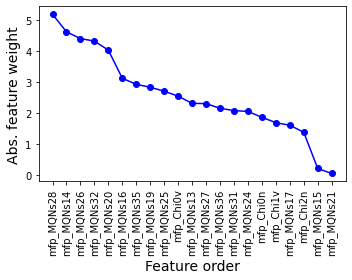

In [57]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
ax1.plot(range(1,len(sel_features)+1), np.abs(weights[order]), '-bo')
#ax1.set_ylim(0.77,0.82)
ax1.set_xlabel('Feature order', fontsize=14)
ax1.set_ylabel('Abs. feature weight', fontsize=14)

ax1.set_xticks(range(1,len(sel_features)+1))
ax1.set_xticklabels(sel_features[order], rotation='90')

plt.tight_layout()

### 11. Prediction for new Polymers

In [ ]:
# Download testdata file in Google colab Folder
!gdown 1XHVI9G8UW31uYPxBD3Ri4XqSDrq2PZuh

In [58]:
test_data = pd.read_csv('Polymer_Eg_testdata.csv')
test_data

,smiles,mfp_MQNs13,mfp_MQNs14,mfp_MQNs15,mfp_MQNs16,mfp_MQNs17,mfp_MQNs18,mfp_MQNs19,mfp_MQNs20,mfp_MQNs21,...,mfp_NumAromaticRings,mfp_NumAliphaticRings,mfp_Chi0n,mfp_Chi0v,mfp_Chi1n,mfp_Chi1v,mfp_Chi2n,mfp_Chi2v,mfp_HallKierAlpha,mfp_tpsa
0,[*]CC([*])c1ccc(C(=O)CCN2CCOCC2)cc1,0.692308,0.025641,0.0,0.230769,0.076923,0.0,0.153846,0.128205,0.076923,...,0.025641,0.025641,0.763172,0.224711,0.385466,0.116236,0.071952,0.071952,0.030513,0.189359
1,[*]C(=O)OCCCCOC(=O)N1CCN([*])CC1,0.764706,0.058824,0.0,0.176471,0.000000,0.0,0.147059,0.294118,0.176471,...,0.000000,0.029412,0.750806,0.221395,0.368823,0.105670,0.055939,0.055939,0.038235,0.499044
2,[*]c1cc(CCCC(F)(F)C(F)(F)C(F)(F)C(F)(F)F)c([*])s1,0.833333,0.000000,0.0,0.100000,0.066667,0.0,0.200000,0.000000,0.000000,...,0.033333,0.000000,0.610331,0.337548,0.303636,0.180853,0.113404,0.133817,0.031000,0.000000
3,[*]OC1C(C)(C)C([*])C1(C)C,0.840000,0.000000,0.0,0.160000,0.000000,0.0,0.200000,0.080000,0.040000,...,0.000000,0.040000,0.816330,0.176330,0.404495,0.088165,0.078165,0.078165,0.001600,0.202300
4,[*]NC(C)C(=O)NCC(=O)NCC([*])=O,0.846154,0.115385,0.0,0.000000,0.000000,0.0,0.269231,0.346154,0.230769,...,0.000000,0.000000,0.733323,0.233323,0.346895,0.105016,0.058007,0.058007,0.055000,0.973942
5,[*]NC(=O)C(S1)=CC=C1C(C=C2)=CC=C2[*],0.521739,0.043478,0.0,0.260870,0.217391,0.0,0.086957,0.130435,0.086957,...,0.086957,0.000000,0.685379,0.329574,0.346974,0.191412,0.100672,0.145047,0.070000,0.468370
6,[*]CCc1ccc([*])c(Cl)c1Cl,0.666667,0.000000,0.0,0.166667,0.166667,0.0,0.111111,0.000000,0.000000,...,0.055556,0.000000,0.708663,0.348210,0.354331,0.174105,0.083498,0.125494,0.011111,0.000000
7,[*]C(C=C1)=CC=C1C(=S)C(S2)=CC=C2O[*],0.500000,0.045455,0.0,0.272727,0.227273,0.0,0.136364,0.090909,0.045455,...,0.090909,0.000000,0.669307,0.379897,0.339761,0.217784,0.104444,0.167690,0.054091,0.229886
8,[*]Oc1ccc(CC(NC(=O)CCc2ccc(OC(=O)CCCCCCC([*])=...,0.788732,0.056338,0.0,0.084507,0.084507,0.0,0.253521,0.211268,0.112676,...,0.028169,0.000000,0.736689,0.243732,0.368166,0.123723,0.074394,0.074394,0.051831,0.419014
9,[*]CC([*])C=C,0.833333,0.083333,0.0,0.000000,0.000000,0.0,0.166667,0.000000,0.000000,...,0.000000,0.000000,0.833333,0.166667,0.395833,0.062500,0.020833,0.020833,0.021667,0.000000


In [59]:
test_X = test_data[sel_features]
test_X

,mfp_MQNs13,mfp_MQNs14,mfp_MQNs15,mfp_MQNs16,mfp_MQNs17,mfp_MQNs19,mfp_MQNs20,mfp_MQNs21,mfp_MQNs24,mfp_MQNs25,...,mfp_MQNs27,mfp_MQNs28,mfp_MQNs31,mfp_MQNs32,mfp_MQNs35,mfp_MQNs36,mfp_Chi0n,mfp_Chi0v,mfp_Chi1v,mfp_Chi2n
0,0.692308,0.025641,0.0,0.230769,0.076923,0.153846,0.128205,0.076923,0.0,0.0,...,0.000000,0.025641,0.179487,0.102564,0.000000,0.051282,0.763172,0.224711,0.116236,0.071952
1,0.764706,0.058824,0.0,0.176471,0.000000,0.147059,0.294118,0.176471,0.0,0.0,...,0.058824,0.058824,0.058824,0.117647,0.000000,0.029412,0.750806,0.221395,0.105670,0.055939
2,0.833333,0.000000,0.0,0.100000,0.066667,0.200000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.133333,0.000000,0.033333,0.000000,0.610331,0.337548,0.180853,0.113404
3,0.840000,0.000000,0.0,0.160000,0.000000,0.200000,0.080000,0.040000,0.0,0.0,...,0.040000,0.000000,0.000000,0.160000,0.000000,0.000000,0.816330,0.176330,0.088165,0.078165
4,0.846154,0.115385,0.0,0.000000,0.000000,0.269231,0.346154,0.230769,0.0,0.0,...,0.000000,0.230769,0.000000,0.000000,0.000000,0.000000,0.733323,0.233323,0.105016,0.058007
5,0.521739,0.043478,0.0,0.260870,0.217391,0.086957,0.130435,0.086957,0.0,0.0,...,0.000000,0.086957,0.434783,0.000000,0.043478,0.043478,0.685379,0.329574,0.191412,0.100672
6,0.666667,0.000000,0.0,0.166667,0.166667,0.111111,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.055556,0.708663,0.348210,0.174105,0.083498
7,0.500000,0.045455,0.0,0.272727,0.227273,0.136364,0.090909,0.045455,0.0,0.0,...,0.045455,0.045455,0.454545,0.000000,0.045455,0.045455,0.669307,0.379897,0.217784,0.104444
8,0.788732,0.056338,0.0,0.084507,0.084507,0.253521,0.211268,0.112676,0.0,0.0,...,0.042254,0.070423,0.169014,0.000000,0.000000,0.028169,0.736689,0.243732,0.123723,0.074394
9,0.833333,0.083333,0.0,0.000000,0.000000,0.166667,0.000000,0.000000,0.0,0.0,...,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.833333,0.166667,0.062500,0.020833


In [60]:
pred_test_y = selector.estimator_.predict(test_X.values)
pred_test_y

array([4.92635497, 5.80185306, 5.16691729, 5.85946376, 5.11948703,
       2.84503517, 4.1645666 , 2.33661385, 4.74766677, 4.44719443])

Text(0.5, 0, 'Polymer ID')

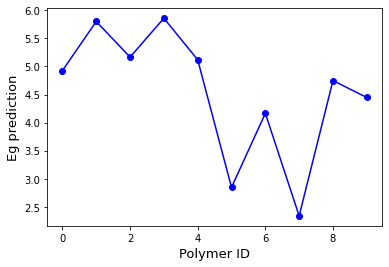

In [61]:
plt.plot(pred_test_y, '-bo')
plt.ylabel('Eg prediction', fontsize=13)
plt.xlabel('Polymer ID', fontsize=13)